In [11]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-04-03 10:47:58,803: Credentials are already in use. The existing account in the session will be replaced.


In [12]:
#Creating a Quantum Circuit with 2 qubits as the parameter
#QuantumCircuit(m,n) : m is no of qubits and n is no of classical bits
circ = QuantumCircuit(2)

In [13]:
#Applying Hadamard on qubit 0
# q0 denotes the top-line- convention in qiskit
circ.h(0)


In [14]:
#Applying CNOT with qubit 0 as control qubit and qubit 1 as target qubit
#cx(m,n): m is control qubit and n is target qubit

circ.cx(0,1)

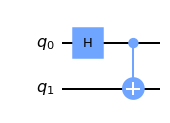

In [5]:
#Visualising the circuit
#mpl stands for matplotlib
circ.draw('mpl')

In [15]:
#simulating results: first up statevector simulator
#Invoking the AER api
#simulation gives access to states
backend = Aer.get_backend('statevector_simulator')

In [16]:
#execute simulates circ on backend
job = execute(circ,backend)


In [17]:
#gives results that statevector simulator possesses
result = job.result()

In [9]:
outputstate = result.get_statevector(circ)
print(outputstate)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


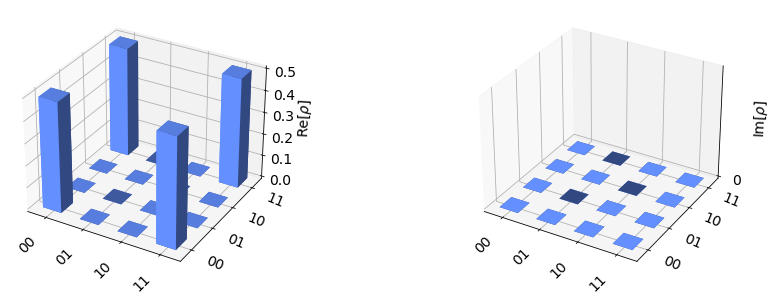

In [18]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)
#left side represents real value of density matrices and right side gives imaginary balue of density matrices
#the plot represents the indices of the density matrix = sigma(p |psi><psi| )

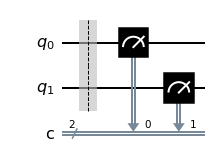

In [19]:
#adding measurements to our circuits

meas = QuantumCircuit(2,2) # 2 classical bits
meas.barrier(range(2)) # for dividing etween circ and meas

#perform measurement
meas.measure(range(2),range(2)) #mapping qubit to classical bit
meas.draw('mpl')

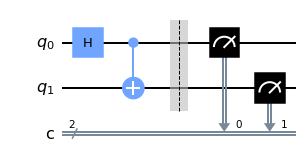

In [20]:
#combining the circuit
qc = circ+meas
qc.draw('mpl')

In [21]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc,backend_sim,shots = 2000) #shots is the no of measurements to be made
result_sim = job_sim.result()

In [22]:
#measurement results give counts that resulted in different states
counts = result_sim.get_counts(qc)
print(counts)

{'00': 1001, '11': 999}


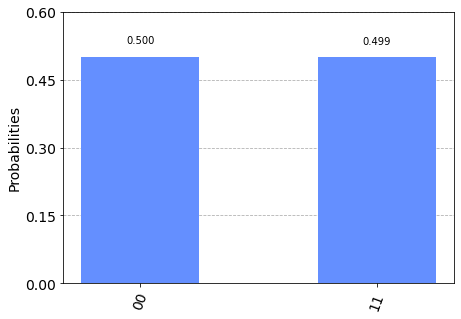

In [23]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)